In [125]:
#import all modules
import pandas as pd
import numpy as np
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import json

In [7]:
#read data
%time df = pd.read_csv('train_customer pattern.csv')

<string>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.


Wall time: 28.4 s


In [8]:
#read data
%time df1 = dd.read_csv('train_customer pattern.csv')

Wall time: 33.1 ms


In [16]:
# Describing the data
df.describe()

,date,visitId,visitNumber,visitStartTime
count,9.036530e+05,9.036530e+05,903653.000000,9.036530e+05
mean,2.016589e+07,1.485007e+09,2.264897,1.485007e+09
std,4.697698e+03,9.022124e+06,9.283735,9.022124e+06
min,2.016080e+07,1.470035e+09,1.000000,1.470035e+09
25%,2.016103e+07,1.477561e+09,1.000000,1.477561e+09
50%,2.017011e+07,1.483949e+09,1.000000,1.483949e+09
75%,2.017042e+07,1.492759e+09,1.000000,1.492759e+09
max,2.017080e+07,1.501657e+09,395.000000,1.501657e+09


In [27]:
# Describing the data
df['device'][1]

'{"browser": "Firefox", "browserVersion": "not available in demo dataset", "browserSize": "not available in demo dataset", "operatingSystem": "Macintosh", "operatingSystemVersion": "not available in demo dataset", "isMobile": false, "mobileDeviceBranding": "not available in demo dataset", "mobileDeviceModel": "not available in demo dataset", "mobileInputSelector": "not available in demo dataset", "mobileDeviceInfo": "not available in demo dataset", "mobileDeviceMarketingName": "not available in demo dataset", "flashVersion": "not available in demo dataset", "language": "not available in demo dataset", "screenColors": "not available in demo dataset", "screenResolution": "not available in demo dataset", "deviceCategory": "desktop"}'

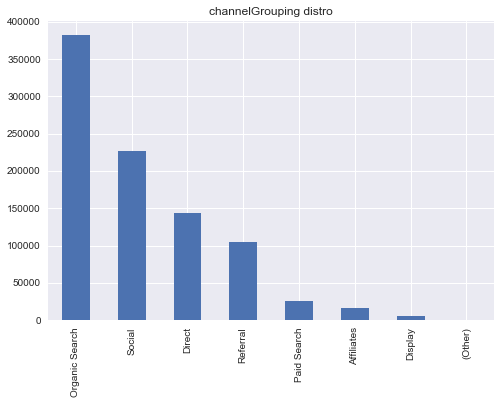

In [64]:
df.channelGrouping.value_counts().plot(kind="bar",title="channelGrouping distro")#,figsize=(8,8),rot=25,colormap='Paired')
plt.show()

In [73]:
df["date"] = pd.to_datetime(df["date"],format="%Y%m%d")
df["visitStartTime"] = pd.to_datetime(df["visitStartTime"])#,unit='ns')

In [76]:
list_of_devices = df.device.apply(json.loads).tolist()

In [78]:
keys = []
for devices_iter in list_of_devices:
    for list_element in list(devices_iter.keys()):
        if list_element not in keys:
            keys.append(list_element)

In [81]:
keys

['browser',
 'browserVersion',
 'browserSize',
 'operatingSystem',
 'operatingSystemVersion',
 'isMobile',
 'mobileDeviceBranding',
 'mobileDeviceModel',
 'mobileInputSelector',
 'mobileDeviceInfo',
 'mobileDeviceMarketingName',
 'flashVersion',
 'language',
 'screenColors',
 'screenResolution',
 'deviceCategory']

In [87]:
df1 = pd.DataFrame(df.device.apply(json.loads).tolist())[["browser","operatingSystem","deviceCategory","isMobile"]]

In [89]:
df1.describe()

,browser,operatingSystem,deviceCategory,isMobile
count,903653,903653,903653,903653
unique,54,20,3,2
top,Chrome,Windows,desktop,False
freq,620364,350072,664479,664530


In [90]:
fig, axes = plt.subplots(2,2,figsize=(15,15))
df1["isMobile"].value_counts().plot(kind="bar",ax=axes[0][0],rot=25,legend="isMobile",color='tan')
df1["browser"].value_counts().head(10).plot(kind="bar",ax=axes[0][1],rot=40,legend="browser",color='teal')
df1["deviceCategory"].value_counts().head(10).plot(kind="bar",ax=axes[1][0],rot=25,legend="deviceCategory",color='lime')
df1["operatingSystem"].value_counts().head(10).plot(kind="bar",ax=axes[1][1],rot=80,legend="operatingSystem",color='c')

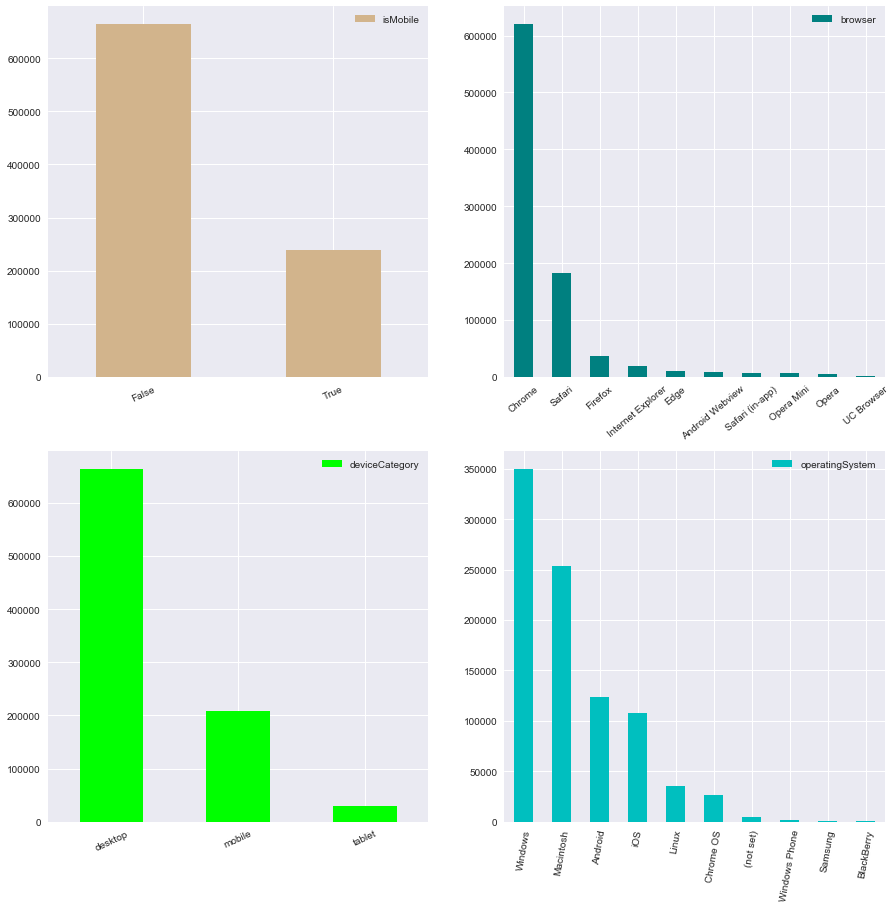

In [91]:
plt.show()

In [104]:
tmp_geo_df = pd.DataFrame(df.geoNetwork.apply(json.loads).tolist())[["continent","subContinent","country","city"]]

In [113]:
fig, axes = plt.subplots(3,2, figsize=(15,15))
tmp_geo_df["continent"].value_counts().plot(kind="bar",ax=axes[0][0],title="Global Distributions",rot=0,color="c")
tmp_geo_df[tmp_geo_df["continent"] == "Americas"]["subContinent"].value_counts().plot(kind="bar",ax=axes[1][0], title="America Distro",rot=0,color="tan")
tmp_geo_df[tmp_geo_df["continent"] == "Asia"]["subContinent"].value_counts().plot(kind="bar",ax=axes[0][1], title="Asia Distro",rot=0,color="r")
tmp_geo_df[tmp_geo_df["continent"] == "Europe"]["subContinent"].value_counts().plot(kind="bar",ax=axes[1][1],  title="Europe Distro",rot=0,color="lime")
tmp_geo_df[tmp_geo_df["continent"] == "Oceania"]["subContinent"].value_counts().plot(kind="bar",ax = axes[2][0], title="Oceania Distro",rot=0,color="teal")
tmp_geo_df[tmp_geo_df["continent"] == "Africa"]["subContinent"].value_counts().plot(kind="bar" , ax=axes[2][1], title="Africa Distro",rot=0,color="silver")

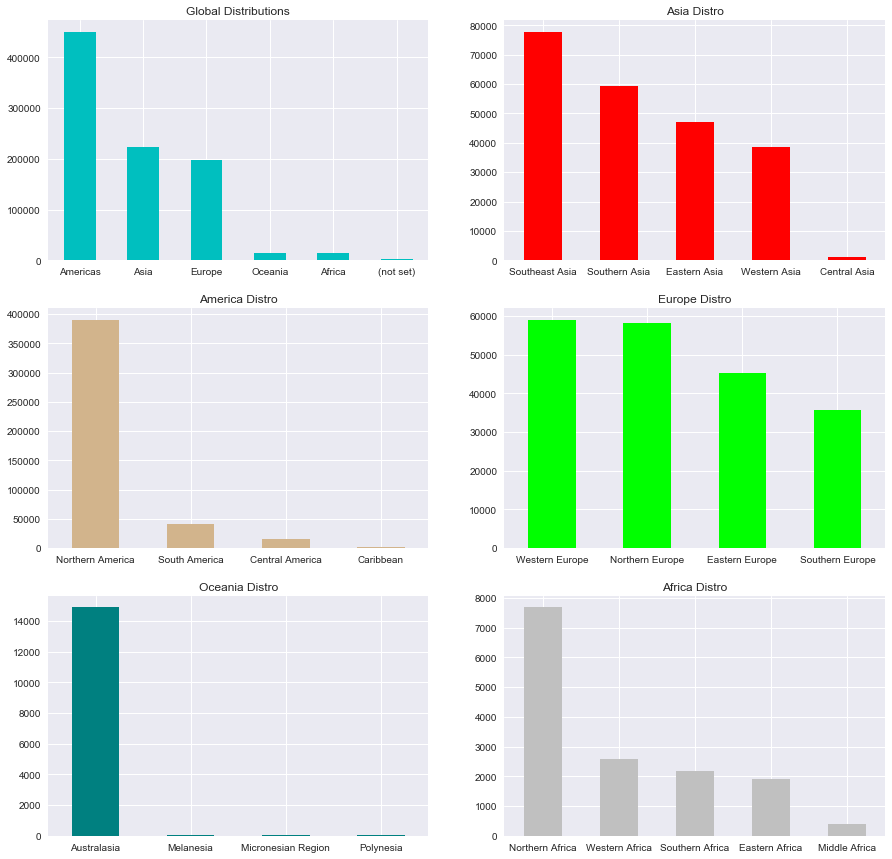

In [114]:
plt.show()

In [115]:
df["revenue"] = pd.DataFrame(df.totals.apply(json.loads).tolist())[["transactionRevenue"]]

In [123]:
df.totals[111]

'{"visits": "1", "hits": "1", "pageviews": "1", "bounces": "1", "newVisits": "1"}'

In [126]:
repetitive_users = list(np.sort(list(collections.Counter(list(df["fullVisitorId"])).values())))

In [132]:
date_list = np.sort(list(set(list(df["date"]))))

In [135]:
set(list(df["date"]))

{Timestamp('2016-08-01 00:00:00'),
 Timestamp('2016-08-02 00:00:00'),
 Timestamp('2016-08-03 00:00:00'),
 Timestamp('2016-08-04 00:00:00'),
 Timestamp('2016-08-05 00:00:00'),
 Timestamp('2016-08-06 00:00:00'),
 Timestamp('2016-08-07 00:00:00'),
 Timestamp('2016-08-08 00:00:00'),
 Timestamp('2016-08-09 00:00:00'),
 Timestamp('2016-08-10 00:00:00'),
 Timestamp('2016-08-11 00:00:00'),
 Timestamp('2016-08-12 00:00:00'),
 Timestamp('2016-08-13 00:00:00'),
 Timestamp('2016-08-14 00:00:00'),
 Timestamp('2016-08-15 00:00:00'),
 Timestamp('2016-08-16 00:00:00'),
 Timestamp('2016-08-17 00:00:00'),
 Timestamp('2016-08-18 00:00:00'),
 Timestamp('2016-08-19 00:00:00'),
 Timestamp('2016-08-20 00:00:00'),
 Timestamp('2016-08-21 00:00:00'),
 Timestamp('2016-08-22 00:00:00'),
 Timestamp('2016-08-23 00:00:00'),
 Timestamp('2016-08-24 00:00:00'),
 Timestamp('2016-08-25 00:00:00'),
 Timestamp('2016-08-26 00:00:00'),
 Timestamp('2016-08-27 00:00:00'),
 Timestamp('2016-08-28 00:00:00'),
 Timestamp('2016-08-